# Mario Kart

## Data Prep and EDA

* Getting to know your data: center, spread, shape
* Data types: numerical, categorical, nominal, ordinal, boolean
* Cardinality, duplications, and missing data
* Outliers
* Engineer features with too many labels
* Understanding relationships between variables: feature with feature, feature with target
* Feature engineering
* Feature selection

In [ ]:
# get data
import pandas as pd

mariocart = pd.read_csv('mariokart.csv', index_col=0)
print(mariocart.shape)
print(mariocart.head())

(108, 19)
   Baby Daisy   Luigi      Toad     Yoshi    Bowser  Donkey Kong  \
0      2.4110  2.4110 -0.626361  0.074411  1.211789    -1.211789   
1      1.0429  1.0429  0.717901  1.126810  2.053112    -2.053112   
2      0.5595  0.5595 -0.168204  1.814973  1.343802    -1.343802   
3      0.1680  0.1680       NaN -0.052597  0.927656    -0.927656   
4     -1.8362 -1.8362  0.229791  0.402646  0.309740    -0.309740   

   Princess Peach  Isabelle  Koopa Troopa     Mario  Birdo  Baby Mario  \
0        1.181437  1.244480      0.910653 -0.060940   0.07        0.03   
1        0.634625  1.653490      0.715433  2.215726   0.07        0.03   
2        0.371198 -0.623509      0.395969 -0.950355   0.07        0.03   
3        1.324177 -0.137387     -0.271712  0.747625   0.07        0.03   
4             NaN       NaN      0.582512 -0.547232   0.07        0.03   

      Wario  Mario Kart      Cat Peach King Boo Inkling  Chain Chomp  \
0  'medium'   92.540574  kind of agree      yes    down     5.23

### Constant Features

In [ ]:
# replace missing values and then check how many unique values are in each variable
few_values = [
    val for val in mariocart.columns if len(mariocart[val].fillna(0).unique()) == 1
]

few_values

['Baby Mario']

### Quasi Constant Features

In [ ]:
# quasi constant values (sometimes these may be boolean features)
for val in mariocart.columns.sort_values():
    if (len(mariocart[val].unique()) < 3):
        print(mariocart[val].value_counts())

0.03    108
Name: Baby Mario, dtype: int64
0.07    107
Name: Birdo, dtype: int64
down    59
up      49
Name: Inkling, dtype: int64
yes    62
no     46
Name: King Boo, dtype: int64


### Duplicates

In [ ]:
# duplicate rows
mariocart[mariocart.duplicated(keep=False)]

,Baby Daisy,Luigi,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Birdo,Baby Mario,Wario,Mario Kart,Cat Peach,King Boo,Inkling,Chain Chomp,Mii
0,2.4110,2.4110,-0.626361,0.074411,1.211789,-1.211789,1.181437,1.244480,0.910653,-0.060940,0.07,0.03,'medium',92.540574,kind of agree,yes,down,5.233643,10.335821
1,1.0429,1.0429,0.717901,1.126810,2.053112,-2.053112,0.634625,1.653490,0.715433,2.215726,0.07,0.03,'medium',157.505874,kind of agree,yes,up,6.306884,10.648843
2,0.5595,0.5595,-0.168204,1.814973,1.343802,-1.343802,0.371198,-0.623509,0.395969,-0.950355,0.07,0.03,'fast',6.590651,agree,no,down,4.514619,9.595727
3,0.1680,0.1680,NaN,-0.052597,0.927656,-0.927656,1.324177,-0.137387,-0.271712,0.747625,0.07,0.03,'fast',-131.240802,agree,no,down,5.021733,9.980792
4,-1.8362,-1.8362,0.229791,0.402646,0.309740,-0.309740,NaN,NaN,0.582512,-0.547232,0.07,0.03,'slow',99.819530,agree,no,up,3.611539,9.074953
5,0.4679,0.4679,0.581340,-1.451522,0.204382,-0.204382,1.282254,-2.057193,0.371720,-1.331312,0.07,0.03,'fast',-138.509030,neutral,yes,down,8.352267,12.112289
6,-1.1568,-1.1568,-0.102359,0.852872,0.857795,-0.857795,0.331492,1.425452,1.825671,0.219545,0.07,0.03,'medium',141.500670,disagree,no,up,1.984070,8.300301
7,-0.0035,-0.0035,0.446270,-0.924599,0.504912,-0.504912,0.594814,2.375305,1.446061,-2.779021,0.07,0.03,'medium',265.629065,kind of agree,yes,down,3.395887,9.279727
100,2.4110,2.4110,-0.626361,0.074411,1.211789,-1.211789,1.181437,1.244480,0.910653,-0.060940,0.07,0.03,'medium',92.540574,kind of agree,yes,down,5.233643,10.335821
101,1.0429,1.0429,0.717901,1.126810,2.053112,-2.053112,0.634625,1.653490,0.715433,2.215726,0.07,0.03,'medium',157.505874,kind of agree,yes,up,6.306884,10.648843


In [ ]:
# drop duplicate rows
mariocart.drop_duplicates(inplace=True)

In [ ]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(mariocart.columns)):
    orig = mariocart.columns[i]

    for dupe in mariocart.columns[i + 1:]:
        if mariocart[orig].equals(mariocart[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

Baby Daisy looks the same as Luigi


['Luigi']

In [ ]:
# drop the variables that are duplicated or low in variance
mariocart.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)
mariocart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Baby Daisy      100 non-null    float64
 1   Toad            89 non-null     float64
 2   Yoshi           100 non-null    float64
 3   Bowser          92 non-null     float64
 4   Donkey Kong     92 non-null     float64
 5   Princess Peach  92 non-null     float64
 6   Isabelle        86 non-null     float64
 7   Koopa Troopa    97 non-null     float64
 8   Mario           100 non-null    float64
 9   Wario           82 non-null     object 
 10  Mario Kart      100 non-null    float64
 11  Cat Peach       100 non-null    object 
 12  King Boo        100 non-null    object 
 13  Inkling         100 non-null    object 
 14  Chain Chomp     100 non-null    float64
 15  Mii             100 non-null    float64
dtypes: float64(12), object(4)
memory usage: 13.3+ KB


### Missing Values

In [ ]:
# check for nulls
mariocart.isnull().sum()

Baby Daisy         0
Toad              11
Yoshi              0
Bowser             8
Donkey Kong        8
Princess Peach     8
Isabelle          14
Koopa Troopa       3
Mario              0
Wario             18
Mario Kart         0
Cat Peach          0
King Boo           0
Inkling            0
Chain Chomp        0
Mii                0
dtype: int64

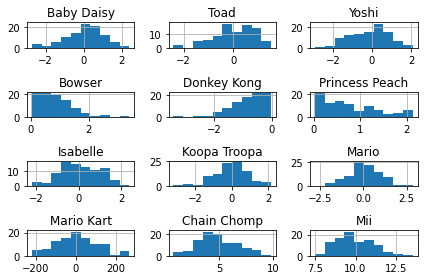

In [ ]:
# look at the shape of variables that are numerical
import matplotlib.pyplot as plt

mariocart.hist()
plt.tight_layout();

In [ ]:
# impute missing values with mean and median
mariocart['Toad'].fillna(round(mariocart['Toad'].mean(), 2), inplace=True)
mariocart['Koopa Troopa'].fillna(round(mariocart['Koopa Troopa'].mean(), 2), inplace=True)
mariocart['Bowser'].fillna(round(mariocart['Bowser'].mean(), 2), inplace=True)
mariocart['Donkey Kong'].fillna(mariocart['Donkey Kong'].median(), inplace=True)
mariocart['Princess Peach'].fillna(mariocart['Princess Peach'].median(), inplace=True)
mariocart['Isabelle'].fillna(mariocart['Isabelle'].median(), inplace=True)
mariocart.isnull().sum()

Baby Daisy         0
Toad               0
Yoshi              0
Bowser             0
Donkey Kong        0
Princess Peach     0
Isabelle           0
Koopa Troopa       0
Mario              0
Wario             18
Mario Kart         0
Cat Peach          0
King Boo           0
Inkling            0
Chain Chomp        0
Mii                0
dtype: int64

In [ ]:
# impute missing values with mode
print(mariocart['Wario'].value_counts(dropna=False))

'medium'    28
'slow'      28
'fast'      26
NaN         18
Name: Wario, dtype: int64


In [ ]:
# replace work_status with mode (not employed)
mariocart['Wario'].fillna(mariocart['Wario'].mode()[0], inplace=True)
mariocart.isnull().sum()

Baby Daisy        0
Toad              0
Yoshi             0
Bowser            0
Donkey Kong       0
Princess Peach    0
Isabelle          0
Koopa Troopa      0
Mario             0
Wario             0
Mario Kart        0
Cat Peach         0
King Boo          0
Inkling           0
Chain Chomp       0
Mii               0
dtype: int64

### Engineer Features With Too Many Labels

In [ ]:
# how many different home destination labels are there?
# mariocart['location'].value_counts(dropna=False).sum()

In [ ]:
# null home.dest values?
# print(len(mariocart[mariocart['location'].isnull()]))
# mariocart[mariocart['location'].isnull()]

In [ ]:
# import re

# def cat_home(r):
#     text = str(r['home.dest']).strip()
#     if bool(re.search('[A-Z]{2}$', text[-2:])):
#         return 'North America'
#     elif text == 'nan':
#         return 'Missing'
#     else:
#         return 'Not North America'

# mariocart['cat_home'] = mariocart.apply(cat_home, axis=1)

# print(mariocart['cat_home'].value_counts())

In [ ]:
# mariocart.drop('location', axis=1, inplace=True)

In [ ]:
# train test split
# remember whatever you do with X_train, do to X_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mariocart.drop(['Mario Kart'], axis=1), mariocart['Mario Kart'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(80, 15)
(20, 15)


In [ ]:
# descriptive statistics example
X_train.describe()

,Baby Daisy,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Chain Chomp,Mii
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.044831,0.133292,-0.026901,0.869974,-0.821410,0.807987,0.096714,0.002092,0.086630,4.944834,10.005149
std,0.928987,0.762363,1.040660,0.586103,0.581410,0.552883,0.877014,0.945108,1.026117,1.862491,1.167776
min,-2.731400,-2.415655,-2.922104,0.037083,-2.605991,0.037457,-2.204556,-3.161117,-2.779021,0.707656,7.856360
25%,-0.453200,-0.243673,-0.914072,0.439368,-1.135822,0.378920,-0.472146,-0.515789,-0.502330,3.505176,9.203502
50%,0.115050,0.040000,0.034652,0.834697,-0.725993,0.637813,0.039016,-0.017943,0.019381,4.872206,9.906376
75%,0.731000,0.719305,0.795356,1.186424,-0.361640,1.201492,0.672628,0.529450,0.712178,6.161283,10.741554
max,2.045500,1.527723,2.084597,2.605991,-0.018041,2.127720,2.375305,2.142494,2.857184,9.839862,13.504985


### Quartiles

https://en.wikipedia.org/wiki/Interquartile_range

Interquartile range<br />
Whiskers<br />
Fence: https://www.statisticshowto.com/upper-and-lower-fences/

Outliers<br />
Boxplots<br />
Violin plots

In [ ]:
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = mariocart[feat].quantile(0.25)
    q3 = mariocart[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = mariocart[feat][mariocart[feat] < lower_fence].count()
    upper_count = mariocart[feat][mariocart[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Toad outliers = 2: lower_fence: -1.8499055845580001, upper_fence: 2.0710576636808744, lower_count: 2, upper_count: 0
Yoshi outliers = 0: lower_fence: -3.1492884123052853, upper_fence: 2.8112889128851446, lower_count: 0, upper_count: 0
Bowser outliers = 3: lower_fence: -0.664397210410554, upper_fence: 2.3442962822573463, lower_count: 0, upper_count: 3
Donkey Kong outliers = 2: lower_fence: -2.3408375782175255, upper_fence: 0.7297528541826689, lower_count: 2, upper_count: 0
Princess Peach outliers = 0: lower_fence: -0.8977203781310288, upper_fence: 2.4399816588673993, lower_count: 0, upper_count: 0
Isabelle outliers = 0: lower_fence: -2.2330638641655494, upper_fence: 2.4627176311707437, lower_count: 0, upper_count: 0
Koopa Troopa outliers = 4: lower_fence: -2.1430853868695863, upper_fence: 2.132970834071397, lower_count: 3, upper_count: 1
Mario outliers = 2: lower_fence: -2.377468770087212, upper_fence: 2.622900710188029, lower_count: 1, upper_count: 1
Chain Chomp outliers = 0: lower_fen

<AxesSubplot:>

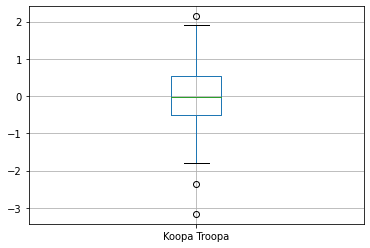

In [ ]:
# Assignment boxplot
X_train.boxplot(column=['Koopa Troopa'])

<AxesSubplot:xlabel='Bowser'>

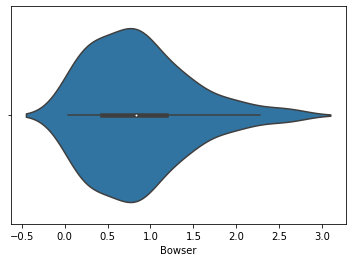

In [ ]:
# Assignment violinplot
import seaborn as sns

sns.violinplot(x=X_train['Bowser'])

## Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase... Correlations are useful because they can indicate a predictive relationship that can be exploited in practice (paras. 1 - 2).

https://en.wikipedia.org/wiki/Correlation.

### Correlation Between Features

* anything above .9 do something about it
* between .5 and .7 may need a closer look

Correlation does not imply cause causation. Warm days on the beach, ice cream, and shark bites.

### Pearson’s r (correlation coefficient)

$\rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* Shows linear relationship between two continuous variables
* How one variable changes as another variable changes
* Measures both strength and direction

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php<br />
https://www.mygreatlearning.com/blog/covariance-vs-correlation/

### Covariance

$cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

* Shows how variables change together
* A measure of correlation
* Measures direction

### Multicollinearity

* Makes it difficult to determine which independent variables are influencing the dependent variable

### Correlation vs Multicollinearity

* Correlation measures how two or more variables move together (good between independent and dependent variables)
* (Mutli)collinearity shows a linear relationship, usually high, between features

### Variance Inflation Factor (VIF)

https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

* Minimum possible value is one
* Values over 10 mean multicollinearity

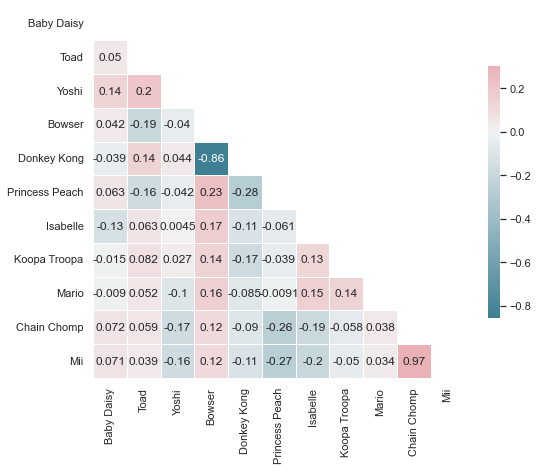

In [ ]:
# correlation heat map
import numpy as np
import seaborn as sns
from scipy import stats

# ptext = f"Pearson r: {round(stats.pearsonr(X_train['Yoshi'], X_train['Baby Daisy'])[0], 2)}"
# sns.regplot(x='Yoshi', y='Baby Daisy', data=X_train, ci=None,
#             line_kws={'color': 'red', 'label': ptext});

# plt.legend()
# plt.show();

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
X_train.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)
X_test.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)

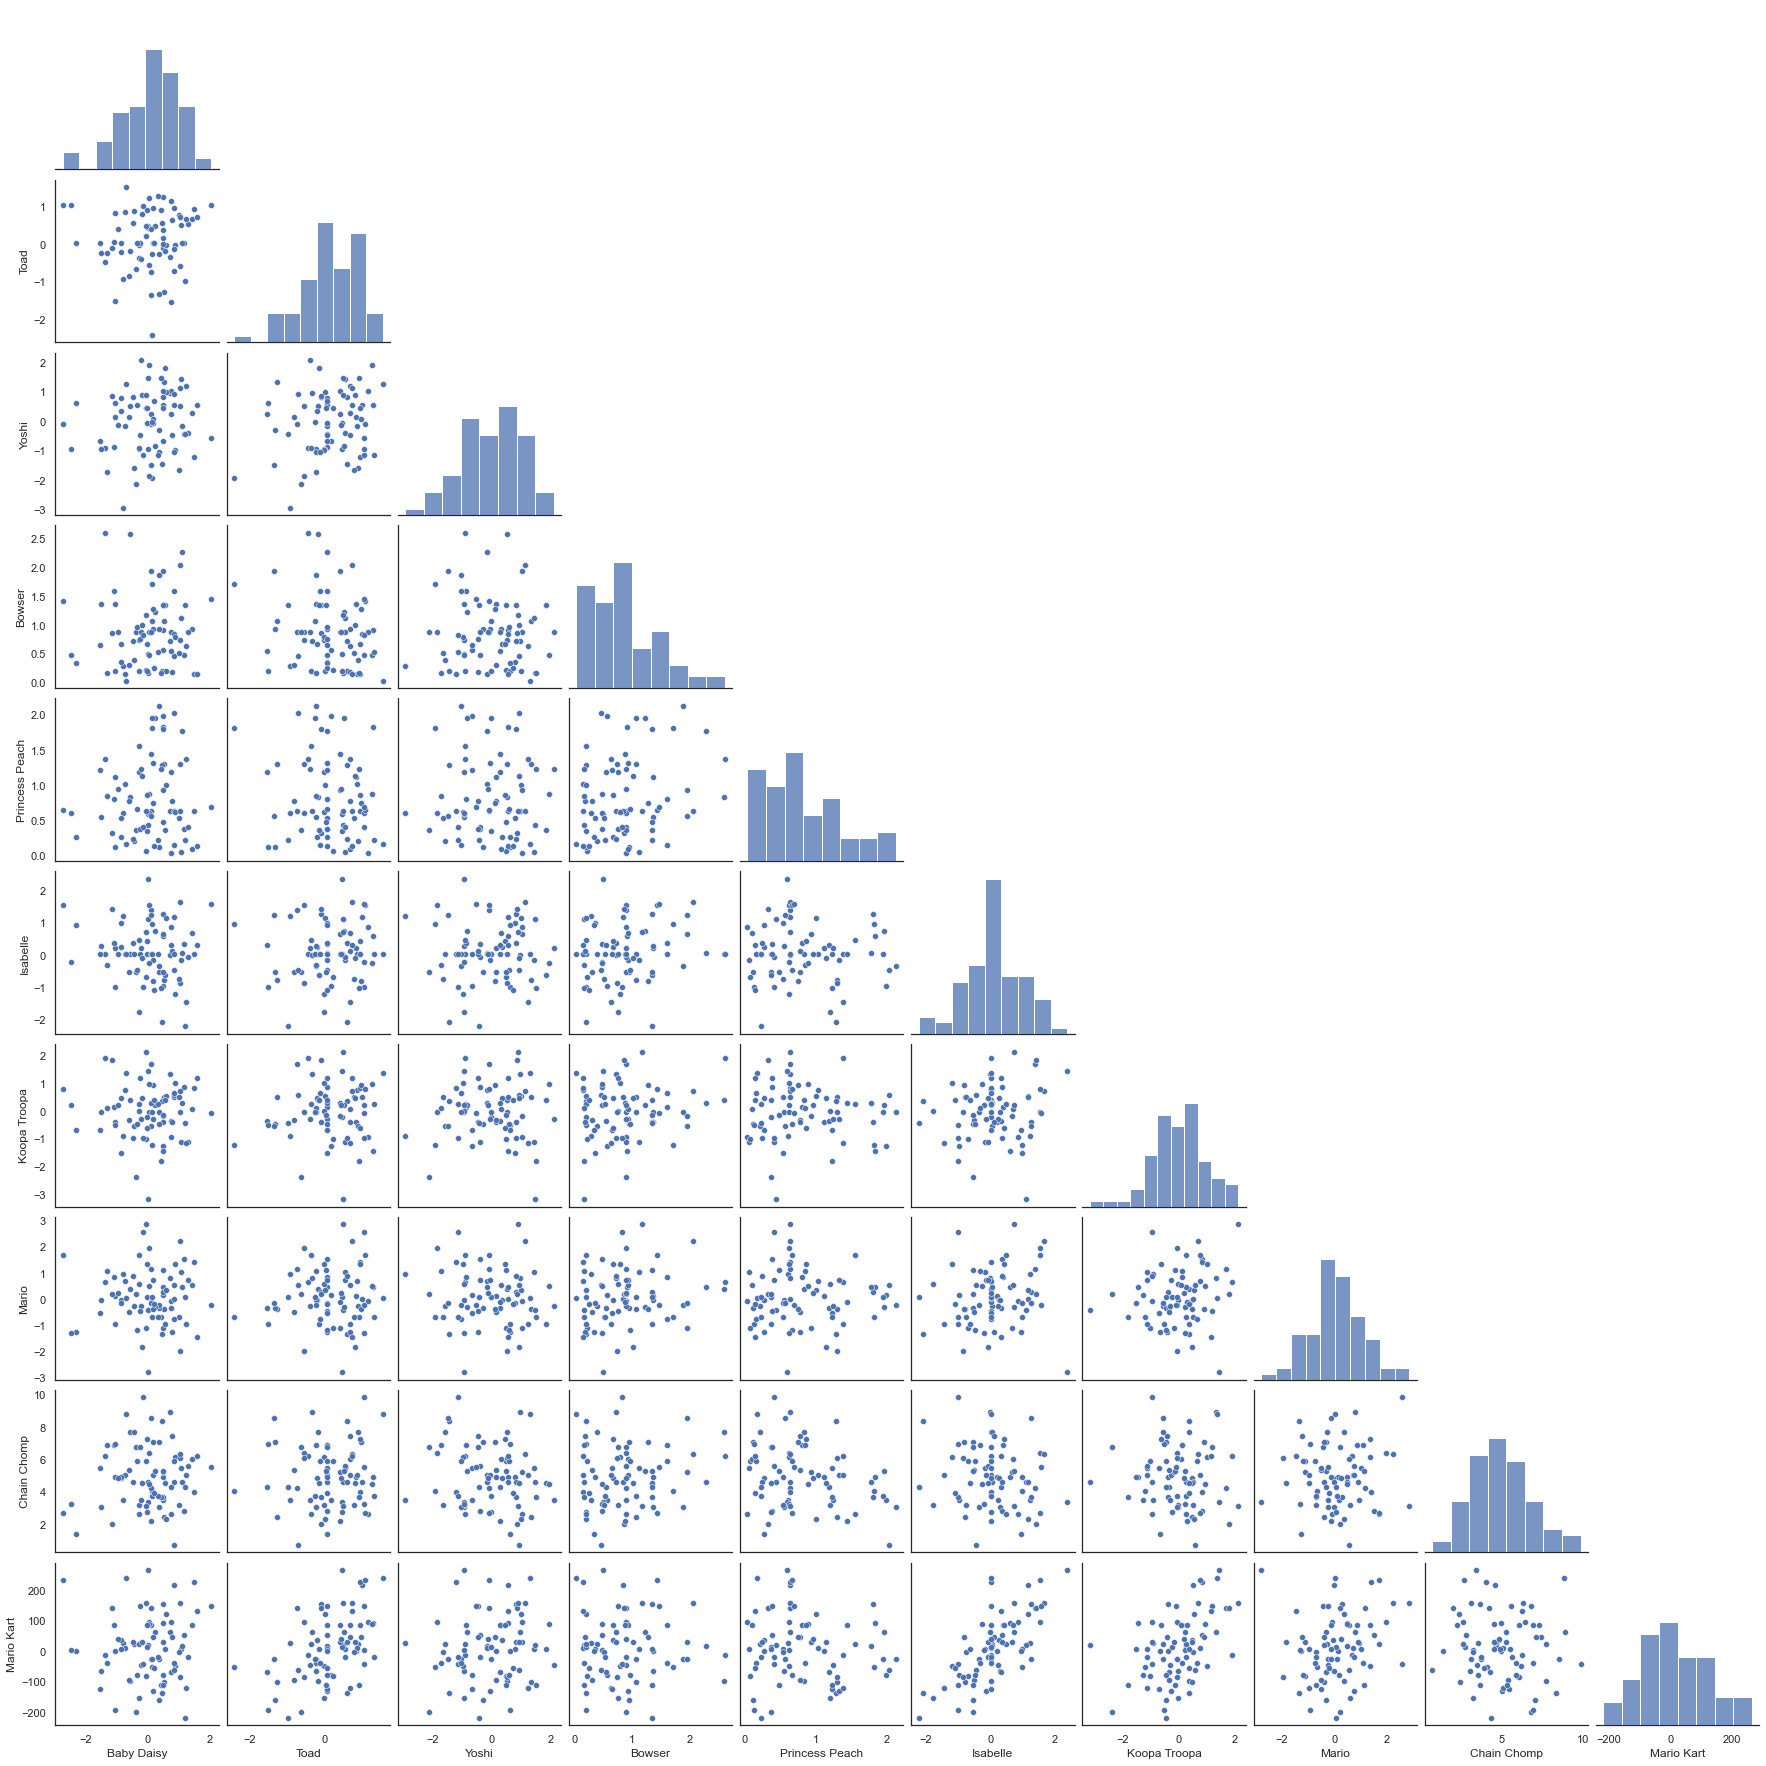

In [ ]:
# sns pairplot
import seaborn as sns

eda_data = X_train.copy()
eda_data['Mario Kart'] = y_train

sns.pairplot(data=eda_data, corner=True);

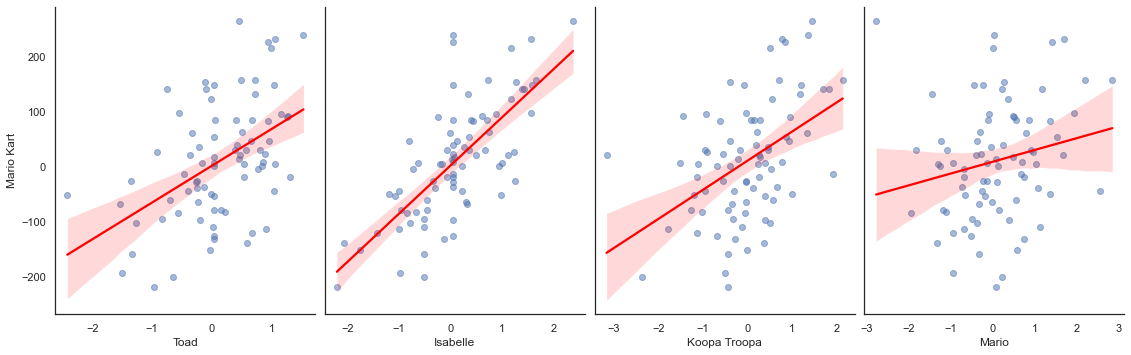

In [ ]:
# scatter plots showing correlation
import pandas as pd
import seaborn as sns

# sns.pairplot(data=eda_data, x_vars=['Assignment1', 'Tutorial', 'Midterm', 'Final'], y_vars='FinalGrade',
sns.pairplot(data=eda_data, x_vars=['Toad', 'Isabelle', 'Koopa Troopa', 'Mario'], y_vars='Mario Kart',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

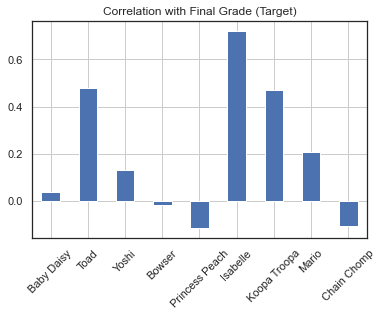

In [ ]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

The Final shows more than 80% correlation with the Final Grade

## Data Visualization

* https://matplotlib.org/stable/gallery/index.html
* http://seaborn.pydata.org/examples/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

### Some Types of Plots

https://towardsdatascience.com/intro-to-dynamic-visualization-with-python-animations-and-interactive-plots-f72a7fb69245

* Static
* Dynamic
* Interactive

In [ ]:
# X_train review
X_train.head()

,Baby Daisy,Toad,Yoshi,Bowser,Princess Peach,Isabelle,Koopa Troopa,Mario,Wario,Cat Peach,King Boo,Inkling,Chain Chomp
55,-0.5642,-0.192343,0.524624,2.583504,0.831498,0.039016,0.390648,0.382061,'medium',disagree,yes,up,7.701620
88,0.5157,-1.272849,1.333259,1.065200,1.303582,-0.779074,0.501417,-0.380325,'medium',disagree,no,up,2.442464
26,1.0546,0.526471,1.432836,1.123660,0.060276,-0.162603,-1.103712,1.025477,'slow',agree,no,up,5.493615
42,-1.0534,0.828715,0.147697,1.363760,1.118405,0.214422,-0.384395,0.129852,'fast',kind of disagree,yes,up,4.915322
69,-0.4455,0.884070,-1.580203,0.388673,0.212852,0.048031,-0.542146,-0.268384,'medium',disagree,yes,down,7.698131


In [ ]:
# X_train.describe()

In [ ]:
# histogram
# X_train['soil'].hist()

In [ ]:
# pie plot
# mariocart['quality'].value_counts().plot(kind='pie');

In [ ]:
# bar plot
# mariocart[['temp', 'soil']].mean().plot(kind='bar');

In [ ]:
# bivariate
# mariocart.plot.scatter(x='temp', y='soil', c='black');

In [ ]:
# multivariate
# mariocart.plot.scatter(x='temp', y='soil', c='years_tracked', colormap='viridis');

## Groupby

https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b

In [ ]:
# groupby
# X_train.groupby('has_chemicals')['soil'].agg(['min', 'max', 'mean'])

In [ ]:
# bar chart; https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# X_train.groupby('has_chemicals')['soil'].agg(['min', 'max', 'mean']).plot(kind='bar');

In [ ]:
# horizontal bar chart
# X_train.groupby('has_chemicals')['soil'].agg(['min', 'max', 'mean']).plot(kind='barh');

In [ ]:
# stacked bar
# X_train.groupby('has_chemicals')['soil'].agg(['min', 'max', 'mean']).plot.bar(stacked=True);

## Feature Engineering

In [ ]:
# recheck our data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Baby Daisy      80 non-null     float64
 1   Toad            80 non-null     float64
 2   Yoshi           80 non-null     float64
 3   Bowser          80 non-null     float64
 4   Princess Peach  80 non-null     float64
 5   Isabelle        80 non-null     float64
 6   Koopa Troopa    80 non-null     float64
 7   Mario           80 non-null     float64
 8   Wario           80 non-null     object 
 9   Cat Peach       80 non-null     object 
 10  King Boo        80 non-null     object 
 11  Inkling         80 non-null     object 
 12  Chain Chomp     80 non-null     float64
dtypes: float64(9), object(4)
memory usage: 8.8+ KB


In [ ]:
print(X_train['Wario'].value_counts())
print(X_train['Cat Peach'].value_counts())
print(X_train['King Boo'].value_counts())
print(X_train['Inkling'].value_counts())

'medium'    33
'fast'      26
'slow'      21
Name: Wario, dtype: int64
agree               20
kind of disagree    18
neutral             16
disagree            13
kind of agree       13
Name: Cat Peach, dtype: int64
yes    45
no     35
Name: King Boo, dtype: int64
down    45
up      35
Name: Inkling, dtype: int64


### Bi-Label Mapping

In [ ]:
# bi-label mapping
X_train['Inkling'] = X_train['Inkling'].map({'up':1,'down':0})
X_test['Inkling'] = X_test['Inkling'].map({'up':1,'down':0})

X_train['King Boo'] = X_train['King Boo'].map({'yes':1,'no':0})
X_test['King Boo'] = X_test['King Boo'].map({'yes':1,'no':0})

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Baby Daisy      80 non-null     float64
 1   Toad            80 non-null     float64
 2   Yoshi           80 non-null     float64
 3   Bowser          80 non-null     float64
 4   Princess Peach  80 non-null     float64
 5   Isabelle        80 non-null     float64
 6   Koopa Troopa    80 non-null     float64
 7   Mario           80 non-null     float64
 8   Wario           80 non-null     object 
 9   Cat Peach       80 non-null     object 
 10  King Boo        80 non-null     int64  
 11  Inkling         80 non-null     int64  
 12  Chain Chomp     80 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 8.8+ KB


### One Hot Encoding

In [ ]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

cat_features = ['Wario', 'Cat Peach']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(80, 17)
(20, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Baby Daisy                  80 non-null     float64
 1   Toad                        80 non-null     float64
 2   Yoshi                       80 non-null     float64
 3   Bowser                      80 non-null     float64
 4   Princess Peach              80 non-null     float64
 5   Isabelle                    80 non-null     float64
 6   Koopa Troopa                80 non-null     float64
 7   Mario                       80 non-null     float64
 8   King Boo                    80 non-null     int64  
 9   Inkling                     80 non-null     int64  
 10  Chain Chomp                 80 non-null     float64
 11  Wario_'medium'              80 non-null     float64
 12  Wario_'slow'                80 non-null     float64
 13  Cat Peach_disagree

## Feature Selection

* https://github.com/codingnest/FeatureSelection/blob/master/Data%20Science%20Lifecycle%20-%20Feature%20Selection%20(Filter%2C%20Wrapper%2C%20Embedded%20and%20Hybrid%20Methods).ipynb
* https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

<img src='https://editor.analyticsvidhya.com/uploads/84353IMAGE1.png' alt='feature selection' />

### Feature-engine

https://feature-engine.readthedocs.io/en/latest/

### Filter Methods

* Constant, Quasi Constant, and Duplicated Features
* Correlation
* Variance
* Mutual Information
* Chi-Square Test
* ANOVA
* SelectKBest

### Wrapper Methods

* Backward, Forward, Stepwise Selection (Regression)

### Embedded Methods

* Coefficients (Regression)
* Lasso Regularization
* Tree Importance

### Hybrid Methods

* Recursive Feature Elimination

### Mutual Information

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Text(0, 0.5, 'Mutual Information')

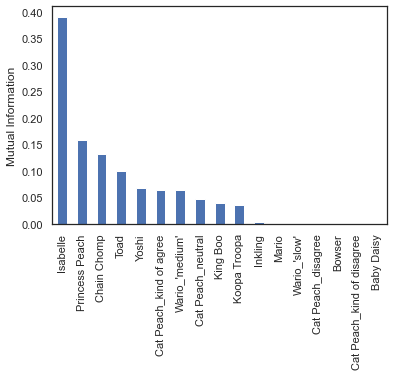

In [ ]:
# Plot the mutual information between X_train and y_train
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information')